In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filename = '/Users/cristianjimenez/Downloads/archive/multimodal_imdb.hdf5'

with h5py.File(filename, 'r') as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])

Keys: <KeysViewHDF5 ['features', 'genres', 'images', 'imdb_ids', 'sequences', 'three_grams', 'vgg_features', 'word_grams']>


In [3]:
with h5py.File(filename, 'r') as f:
    images = f['images']
    total_images = len(images)
    print('Total de imágenes:', total_images)

Total de imágenes: 25959


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..138].


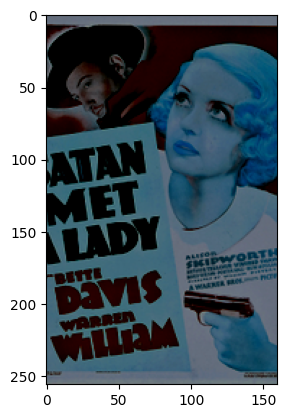

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


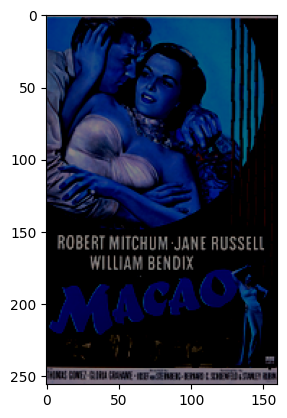

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..141].


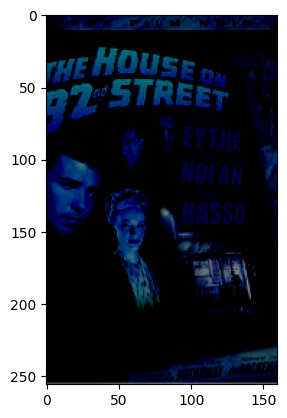

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


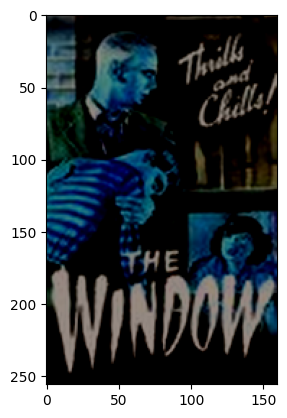

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


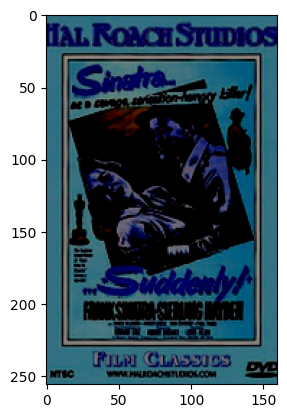

In [4]:
with h5py.File(filename, 'r') as f:
    # Get the images data
    images = f['images']

    # Loop over the images
    for i in range(len(images)):
        # Get the image
        image = images[i]

        # Transpose the image data to (height, width, channels)
        image = np.transpose(image, (1, 2, 0))

        # Display the image using matplotlib
        plt.imshow(image)
        plt.show()

        # Break after displaying the first 5 images
        if i == 4:
            break

In [5]:
genres_list = [
    'Drama',
    'Comedy',
    'Romance',
    'Thriller',
    'Crime',
    'Action',
    'Adventure',
    'Horror',
    'Documentary',
    'Mystery',
    'Sci-Fi',
    'Fantasy',
    'Family',
    'Biography',
    'War',
    'History',
    'Music',
    'Animation',
    'Musical',
    'Western',
    'Sport',
    'Short',
    'Film-Noir',
]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..138].


Géneros de la película: ['Drama', 'Thriller', 'Mystery', 'Film-Noir']


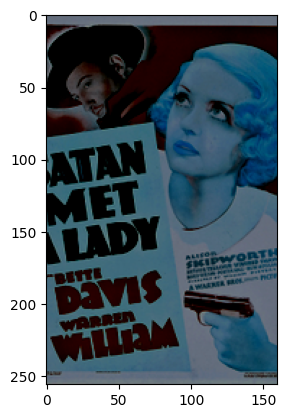

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Géneros de la película: ['Drama', 'Crime', 'Adventure', 'Film-Noir']


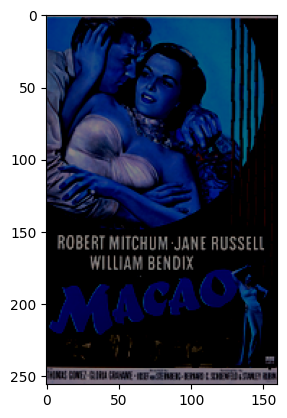

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..141].


Géneros de la película: ['Drama', 'Thriller', 'Crime', 'Mystery', 'Film-Noir']


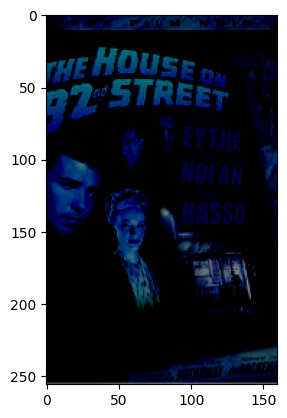

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Géneros de la película: ['Drama', 'Thriller', 'Film-Noir']


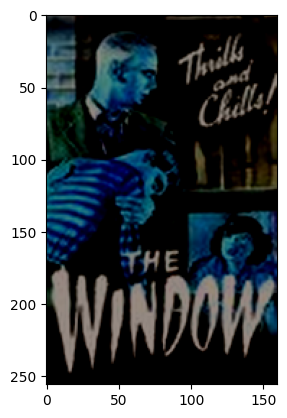

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Géneros de la película: ['Drama', 'Thriller', 'Crime', 'Film-Noir']


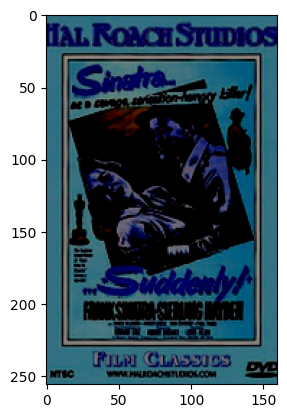

In [6]:
with h5py.File(filename, 'r') as f:
    # Obtiene los datos de las imágenes y los géneros
    images = f['images']
    genres = f['genres']

    # Recorre las primeras 5 imágenes y géneros
    for i in range(5):
        # Obtiene la imagen y el género
        image = images[i]
        genre = genres[i]

        # Transpone los datos de la imagen a (altura, ancho, canales)
        image = np.transpose(image, (1, 2, 0))

        # Convierte genre a una lista de booleanos
        genre_bool = [bool(g) for g in genre]

        # Usa la lista de booleanos para seleccionar los géneros correspondientes de genres_list
        movie_genres = [g for g, b in zip(genres_list, genre_bool) if b]

        # Imprime los géneros de la película
        print('Géneros de la película:', movie_genres)

        # Muestra la imagen usando matplotlib
        plt.imshow(image)
        plt.show()

In [7]:
from sklearn.model_selection import train_test_split

# Define el tamaño de los conjuntos de prueba y validación
test_size = 0.2
val_size = 0.25

# Carga las imágenes y los géneros
with h5py.File(filename, 'r') as f:
    images = f['images'][:5000]
    genres = f['genres'][:5000]

# Divide los datos en conjuntos de entrenamiento y prueba
train_images, test_images, train_genres, test_genres = train_test_split(images, genres, test_size=test_size, random_state=42)

# Divide los datos de entrenamiento en conjuntos de entrenamiento y validación
train_images, val_images, train_genres, val_genres = train_test_split(train_images, train_genres, test_size=val_size, random_state=42)

In [8]:
# Convierte los arrays de booleanos en listas de géneros
train_genres = [[g for g, b in zip(genres_list, genre_bool) if b] for genre_bool in train_genres]

In [9]:
print('Tamaño de los conjuntos de entrenamiento, validación y prueba:')
print(len(train_images), len(val_images), len(test_images))

Tamaño de los conjuntos de entrenamiento, validación y prueba:
3000 1000 1000


In [10]:
def display_image_and_genres(image, genre):
    # Transpone los datos de la imagen a (altura, ancho, canales)
    image = np.transpose(image, (1, 2, 0))

    # Imprime los géneros de la película
    print('Géneros de la película:', genre)

    # Muestra la imagen usando matplotlib
    plt.imshow(image)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Géneros de la película: ['Drama', 'Adventure', 'Family', 'Animation']


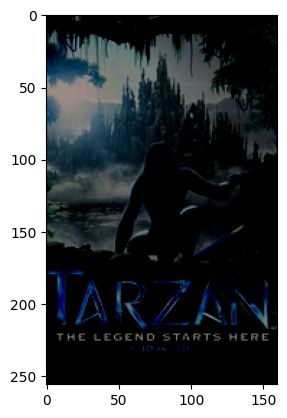

In [14]:
display_image_and_genres(train_images[3], train_genres[3])

--------- separacio de ejercicos ------

In [20]:
def generate_batch(images, genres, b):
    # Selecciona un lote de índices de imágenes al azar
    batch_indices = np.random.choice(len(images), size=b, replace=False)

    # Obtiene las imágenes y los géneros correspondientes a los índices seleccionados
    batch_images = images[batch_indices]
    batch_genres = [genres[i] for i in batch_indices]

    return batch_images, batch_genres

In [21]:
a = generate_batch(train_images, train_genres, 50)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Géneros de la película: ['Action', 'Adventure', 'War', 'History']


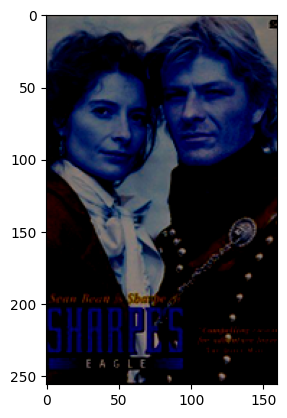

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Géneros de la película: ['Comedy', 'Action', 'Animation']


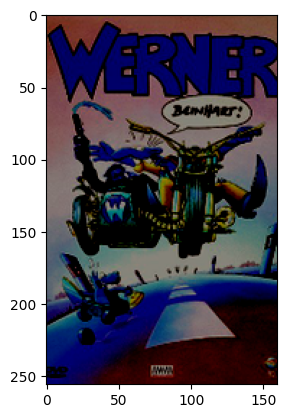

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Géneros de la película: ['Western']


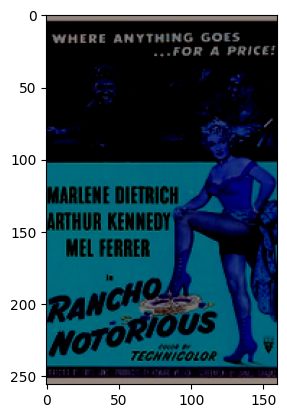

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Géneros de la película: ['Comedy', 'Romance', 'Adventure', 'Fantasy', 'Family', 'Animation', 'Musical']


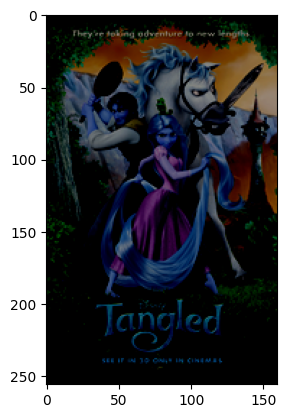

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Géneros de la película: ['Comedy', 'Adventure', 'Horror', 'Fantasy']


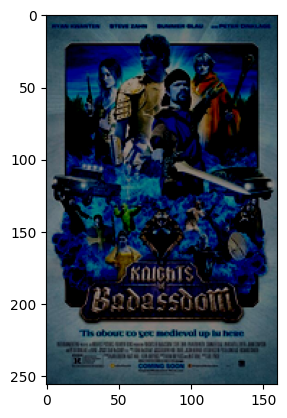

In [22]:
for i in range(5):
    display_image_and_genres(a[0][i], a[1][i])

In [23]:
def jaccard_coefficient(genre_list1, genre_list2):
    # Convierte las listas de géneros en conjuntos
    genre_set1 = set(genre_list1)
    genre_set2 = set(genre_list2)

    # Calcula la intersección y la unión de los dos conjuntos de géneros
    intersection = genre_set1 & genre_set2
    union = genre_set1 | genre_set2
    
    coef = len(intersection) / len(union)
    
    print(f"Intersección: {intersection} - Unión: {union} - Coeficiente de Jaccard: {coef}")

    # Calcula y devuelve el coeficiente de Jaccard
    return coef

In [47]:
batch_images, batch_genres = generate_batch(train_images, train_genres, 30)

In [25]:
def compare_images(base_genre, image_list, genre_list):
    jaccard_scores = [jaccard_coefficient(base_genre, genre) for genre in genre_list]
    return image_list, genre_list, jaccard_scores

In [26]:
base_genre = ['Drama']
image_list, genre_list, jaccard_scores = compare_images(base_genre, batch_images[:10], batch_genres[:10])

Intersección: set() - Unión: {'Action', 'Adventure', 'Fantasy', 'Family', 'Drama', 'Animation'} - Coeficiente de Jaccard: 0.0
Intersección: {'Drama'} - Unión: {'Family', 'Drama'} - Coeficiente de Jaccard: 0.5
Intersección: {'Drama'} - Unión: {'Drama', 'War'} - Coeficiente de Jaccard: 0.5
Intersección: {'Drama'} - Unión: {'Crime', 'Music', 'Romance', 'Drama', 'Thriller'} - Coeficiente de Jaccard: 0.2
Intersección: set() - Unión: {'Family', 'Drama', 'Animation', 'Short'} - Coeficiente de Jaccard: 0.0
Intersección: {'Drama'} - Unión: {'Family', 'Romance', 'Drama', 'Comedy', 'Musical'} - Coeficiente de Jaccard: 0.2
Intersección: {'Drama'} - Unión: {'Drama', 'Crime', 'Music'} - Coeficiente de Jaccard: 0.3333333333333333
Intersección: set() - Unión: {'Drama', 'Comedy', 'Short'} - Coeficiente de Jaccard: 0.0
Intersección: {'Drama'} - Unión: {'War', 'Crime', 'Drama', 'Mystery'} - Coeficiente de Jaccard: 0.25
Intersección: {'Drama'} - Unión: {'Drama', 'Crime', 'Film-Noir'} - Coeficiente de Jacc

In [27]:
def random_sample(image_list, genre_list):
    index = np.random.choice(len(image_list))
    return image_list[index], genre_list[index]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Géneros de la película: ['Drama', 'Family']


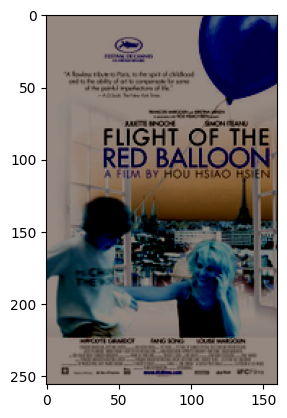

In [30]:
image, genre = random_sample(image_list, genre_list)
display_image_and_genres(image, genre)

In [48]:
def process_batch(image_list, genre_list):
    # Selecciona una imagen y género aleatorios
    base_index = np.random.choice(len(image_list))
    base_image, base_genre = image_list[base_index], genre_list[base_index]

    # Convierte genre_list en un array de NumPy de tipo objeto
    genre_list = np.array(genre_list, dtype=object)

    # Excluye la imagen base de la lista de imágenes y géneros
    compare_image_list = np.delete(image_list, base_index, axis=0)
    compare_genre_list = np.delete(genre_list, base_index, axis=0)

    # Calcula los coeficientes de Jaccard de la imagen aleatoria con todas las demás imágenes
    _, _, jaccard_scores = compare_images(base_genre, compare_image_list, compare_genre_list)

    # Organiza las imágenes por coeficiente de Jaccard en orden descendente
    sorted_indices = np.argsort(jaccard_scores)[::-1]

    # Selecciona la imagen con el coeficiente de Jaccard más alto y la más bajo
    highest_jaccard_image, highest_jaccard_genre = compare_image_list[sorted_indices[0]], compare_genre_list[sorted_indices[0]]
    lowest_jaccard_image, lowest_jaccard_genre = compare_image_list[sorted_indices[-1]], compare_genre_list[sorted_indices[-1]]

    # Devuelve la imagen y género aleatorios, junto con la imagen de mayor Jaccard y la de menor Jaccard
    return (base_image, base_genre), (highest_jaccard_image, highest_jaccard_genre, jaccard_scores[sorted_indices[0]]), (lowest_jaccard_image, lowest_jaccard_genre, jaccard_scores[sorted_indices[-1]])

In [49]:
variable = process_batch(batch_images, batch_genres)

Intersección: {'Drama'} - Unión: {'War', 'Biography', 'Romance', 'Drama', 'Comedy'} - Coeficiente de Jaccard: 0.2
Intersección: set() - Unión: {'Adventure', 'Drama', 'Action', 'War', 'Romance', 'Family', 'Comedy', 'Animation'} - Coeficiente de Jaccard: 0.0
Intersección: set() - Unión: {'War', 'Music', 'Romance', 'Drama', 'Documentary'} - Coeficiente de Jaccard: 0.0
Intersección: {'Romance', 'Drama'} - Unión: {'History', 'War', 'Romance', 'Drama'} - Coeficiente de Jaccard: 0.5
Intersección: set() - Unión: {'War', 'Biography', 'Music', 'Romance', 'Drama', 'Documentary'} - Coeficiente de Jaccard: 0.0
Intersección: set() - Unión: {'War', 'Biography', 'Romance', 'Drama', 'Thriller', 'Horror'} - Coeficiente de Jaccard: 0.0
Intersección: {'Drama', 'War'} - Unión: {'War', 'Romance', 'Drama', 'Comedy'} - Coeficiente de Jaccard: 0.5
Intersección: {'Romance', 'Drama'} - Unión: {'War', 'Music', 'Family', 'Romance', 'Drama'} - Coeficiente de Jaccard: 0.4
Intersección: {'Romance'} - Unión: {'War', '

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Géneros de la película: ['Drama', 'Romance', 'War']


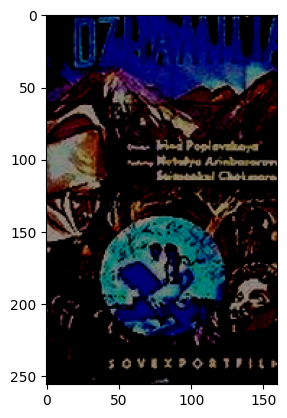

In [50]:
display_image_and_genres(variable[0][0], variable[0][1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Géneros de la película: ['Comedy', 'Action', 'Adventure', 'Family', 'Animation']


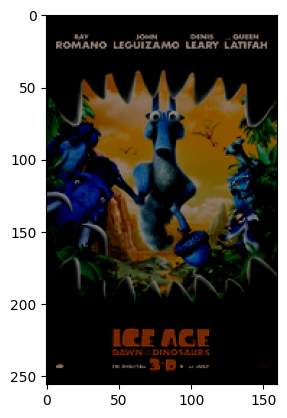

Coeficiente de Jaccard: 0.0


In [52]:
display_image_and_genres(variable[2][0], variable[2][1])
print('Coeficiente de Jaccard:', variable[2][2])

In [53]:
def generate_set(m, b, n):
    results = []
    for _ in range(m):
        image_list, genre_list = generate_batch(train_images, train_genres, b)
        for _ in range(n):
            result = process_batch(image_list, genre_list)
            results.append(result)
    return results

In [54]:
results = generate_set(10, 30, 10)

Intersección: set() - Unión: {'History', 'Biography', 'War', 'Adventure', 'Drama', 'Comedy', 'Musical'} - Coeficiente de Jaccard: 0.0
Intersección: {'Drama'} - Unión: {'History', 'Biography', 'Adventure', 'Drama', 'Fantasy', 'Romance', 'Comedy'} - Coeficiente de Jaccard: 0.14285714285714285
Intersección: {'Drama'} - Unión: {'History', 'Biography', 'Adventure', 'Drama', 'Romance', 'Family', 'Comedy'} - Coeficiente de Jaccard: 0.14285714285714285
Intersección: set() - Unión: {'History', 'Biography', 'War', 'Adventure', 'Crime', 'Drama', 'Documentary'} - Coeficiente de Jaccard: 0.0
Intersección: {'Drama'} - Unión: {'History', 'Biography', 'Adventure', 'Family', 'Drama'} - Coeficiente de Jaccard: 0.2
Intersección: {'Drama', 'History', 'Adventure'} - Unión: {'History', 'Biography', 'Adventure', 'Drama'} - Coeficiente de Jaccard: 0.75
Intersección: {'Drama'} - Unión: {'History', 'Biography', 'Adventure', 'Drama', 'Fantasy', 'Family', 'Sport'} - Coeficiente de Jaccard: 0.14285714285714285
Int

In [55]:
len(results)

100

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Géneros de la película: ['Comedy', 'War', 'Musical']


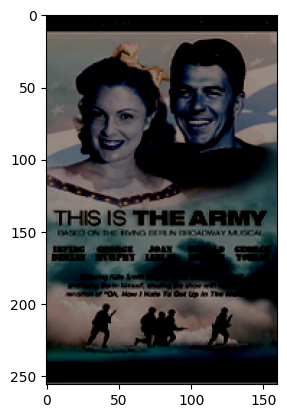

In [60]:
display_image_and_genres(results[0][2][0], results[0][2][1])

In [64]:
import torch

def log_ratio_loss(base, highest, lowest):
    # Extrae las imágenes y los géneros de las tuplas
    a, i, j = torch.tensor(base[0]), torch.tensor(highest[0]), torch.tensor(lowest[0])
    
    # Convierte los géneros a codificación one-hot
    ya = torch.tensor([genres_list.index(genre) for genre in base[1]], dtype=torch.float32)
    yi = torch.tensor([genres_list.index(genre) for genre in highest[1]], dtype=torch.float32)
    yj = torch.tensor([genres_list.index(genre) for genre in lowest[1]], dtype=torch.float32)

    # Calcula las distancias en el espacio de incrustación aprendido
    D_fi = torch.norm(a - i, p=2)
    D_fj = torch.norm(a - j, p=2)

    # Calcula las distancias en el espacio de etiquetas
    D_yi = torch.norm(ya - yi, p=2)
    D_yj = torch.norm(ya - yj, p=2)

    # Calcula los log-ratios
    log_ratio_f = torch.log(D_fi / D_fj)
    log_ratio_y = torch.log(D_yi / D_yj)

    # Calcula la pérdida
    loss = (log_ratio_f - log_ratio_y) ** 2

    return loss

In [66]:
base, highest, lowest = results[0]
losses = []
for result in results:
    base, highest, lowest = result
    loss = log_ratio_loss(base, highest, lowest)
    losses.append(loss)

# Ahora la lista `losses` contiene la pérdida para cada resultado en `results`

ValueError: too many dimensions 'str'